## Lab - Building a CNN model in Keras (Happy House) 

**Objectives**:  Build a Deep Learning algorithm using Keras, a high-level neural networks programming framework, written in Python and running on top of TensorFlow.  

Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. 


###  IMPORTANT 
If you do not have installed tensorflow, keras, pydot, go to Anaconda promt and install them in this order. 

keras has to be installed after tensorflow

> pip install tensorflow

> pip install keras

> pip install pydot


In [165]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

# Import relevant libraries
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image

from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file

from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG


from tensorflow.python.keras.utils.vis_utils import model_to_dot

#from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


##  Problem:  Happy House Challenge

You decided to spend your vacation with friends in a very convenient holiday house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.

As a deep learning expert, to make sure the "Happy" rule is strictly applied, you are going to build an algorithm that uses pictures from the front door camera to check if the person is happy or not. The door should open only if the person is happy. 

You have gathered pictures of your friends and yourself, taken by the front-door camera. The dataset is labbeled. 

<img src="images/house-members.png" style="width:500px;height:250px;">


In [166]:
#Load datset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

#What is the shape of X_train, X_test, Y_train, Y_test ?
print(X_train_orig.shape)
print(X_test_orig.shape)
print(Y_train_orig.shape)
print(Y_test_orig.shape)
    
# How many training and test examples ?
m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]

print("Number of training examples:", m_train)
print("Number of test examples:", m_test)


#Normalize all pixels to become < 1 
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.

# Transpose the labels to become column vector
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T


(600, 64, 64, 3)
(150, 64, 64, 3)
(1, 600)
(1, 150)
Number of training examples: 600
Number of test examples: 150


## Building a model in Keras

Here is an example of a model in Keras:

```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape = input_shape. 
    #This is the shape of the input image.
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    #Conv2D(filters, kernel_size, .... data_format='channels_last',...)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    
# Normalize the activations of the previous layer at each batch, i.e. apply transformation
    #that maintains the mean activation close to 0 and standard deviation close to 1.
    If data_format="channels_last", the axis to be normalized is axis=3. 
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL: helps to lower the dimension of X in height and width.
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # Flatten X (convert the volume X into a vector) + fully connected (dense) output layer
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Creates Keras model object that will be trained and tested. 
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
```

Note that rather than creating and assigning a new variable on each step of forward computations in the layers, in Keras code each line above just reassigns `X` to a new value using `X = ...`. In other words, during each step of forward propagation, we are just writing the latest value in the computation into the same variable `X`. The only exception was `X_input`, which we kept separate and did not overwrite, since we needed it at the end to create the Keras model instance (`model = Model(inputs = X_input, ...)` above). 

**Exercise**: Implement function `HappyModel()`.

In [167]:
def HappyModel(input_shape):
    """
   
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Use the suggested model in the text above to get started, and run through the whole
    # exercise once. Then come back and add more BLOCKS. 
    
    # Input layer
    X_input = Input(input_shape)

    # BLOCK 1: ZeroPadding -> CONV -> BN -> RELU -> MAXP
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool0')(X)

    # BLOCK 2: CONV -> BN -> RELU -> MAXP
    X = Conv2D(64, (3, 3), strides=(1, 1), name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)

    # FLATTEN + DENSE
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

### Train and test the model

Check the arguments of  `model.compile()`, `model.fit()`, `model.evaluate()` in the official [Keras documentation](https://keras.io/models/model/).


In [168]:
# Call HappyModel
model = HappyModel(X_train.shape[1::])

In [169]:
# Compile the model: model.compile(optimizer = "...", loss = "...", metrics ="...")
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [170]:
# Train the model on train data - model.fit(). 
# Choose the number of epochs and the batch size.
model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5649 - loss: 1.7292
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8834 - loss: 0.2683
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9442 - loss: 0.1795
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9368 - loss: 0.1552
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9621 - loss: 0.1333
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9491 - loss: 0.1638
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9799 - loss: 0.0589
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9893 - loss: 0.0422
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9654 - loss: 0.1196
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9853 - loss: 0.0533


Note that if you run `fit()` again, the `model` will continue to train with the parameters it has already learnt instead of reinitializing them.


In [171]:
# Test the model on train data: model.evaluate()
loss, accuracy = model.evaluate(X_train, Y_train)

#Print the Loss and Accuracy with train data 
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9948 - loss: 0.0548
Train Loss: 0.058362122625112534
Train Accuracy: 0.9933333396911621


In [172]:
#Test the model on test data  
loss, accuracy = model.evaluate(X_test, Y_test)

#Print the Loss and Accuracy with test data 
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9641 - loss: 0.1216 
Train Loss: 0.11976193636655807
Train Accuracy: 0.9599999785423279


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


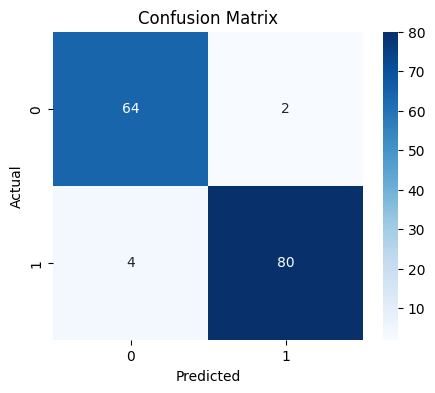

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.98      0.95      0.96        84

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



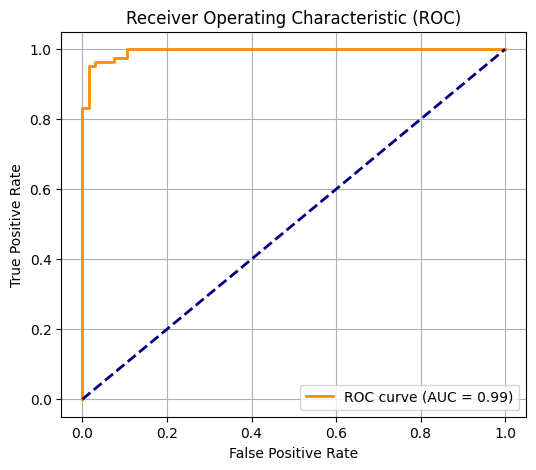

In [173]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Compute and print confusion matrix on test data
# Predict class labels
Y_pred_probs = model.predict(X_test)
Y_pred = (Y_pred_probs > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute and print classification_report on test data
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))


# Compute and plot ROC curve on test data
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



If `happyModel()` function worked, you should have observed at least 75% accuracy. 
As a point of comparison, our model gets around 95% test accuracy  and 99% train accuracy in 40 epochs with a mini batch size of 16 and "adam" optimizer. 

- Change your optimizer. We find Adam works well. 
- If the model is struggling to run and you get memory issues, lower your batch_size. 
- Run on more epochs, until you see the train accuracy plateauing. 


In [174]:
#Prints the details of your layers in a table with the sizes of its inputs/outputs
model.summary()

# plots the model in a nice layout and save it as ".png"
plot_model(model, to_file='HappyModel.png')

Model: "HappyModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_18               │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool0 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 30, 30, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool1 (MaxPooling2D)        │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 1)              │        14,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,669 (444.02 KB)

 Trainable params: 37,825 (147.75 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 75,652 (295.52 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## Test with your own image (Optional)

Take a picture of your face and see if you could enter the Happy House. To do that, add your image to this Jupyter Notebook's directory, in the "images" folder and run the code below and check if the algorithm is right (0 is unhappy, 1 is happy)!
    
NOTE: All pictures (the training and test sub-sets) for this assignment were taken against the same background (since a front door camera is always mounted in the same position). This makes the problem easier, but a model trained on this data may or may not work on your own data. But feel free to give it a try! 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.]]


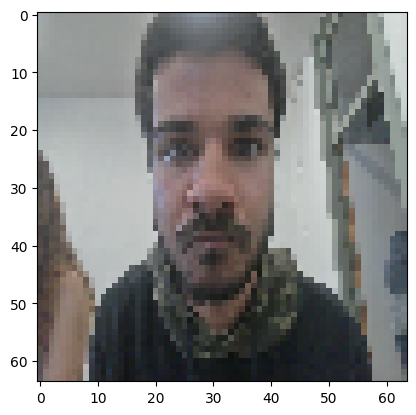

In [184]:
#your own image "my_image.jpg". 
from tensorflow.keras.preprocessing import image

img_path = 'images/2025-05-15-185701.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model.predict(x))